In [1]:
%run setup_notebook.ipynb

/home/thijs/repos/dnp-code/PGM3_correct/source/numba_utilities.py:1109: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dmean_v_dw = np.dot(s1.T, V)
/home/thijs/repos/dnp-code/PGM3_correct/source/numba_utilities.py:1110: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dvar_e_dw = np.dot(s2.T, V)
/home/thijs/repos/dnp-code/PGM3_correct/source/numba_utilities.py:1111: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  tmp3 = np.dot(s3.T, V)
/home/thijs/repos/dnp-code/PGM3_correct/source/numba_utilities.py:946: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 1d, A), array(float32, 2d, A))
  mean_V = np.dot(weights, V) / sum_weights


/home/thijs/repos/dnp-code/rbm_pipeline_functions.py


/home/thijs/.conda/envs/py37/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
baseline with shape (5553, 54334) is not recognized, so it cannot be loaded.
drifts with shape (5553, 2) is not recognized, so it cannot be loaded.
inferredspikes with shape (5553, 54334) is not recognized, so it cannot be loaded.
ljpcoordinates with shape (3, 54334) is not recognized, so it cannot be loaded.
segmentation with shape (30, 598, 1280) is not recognized, so it cannot be loaded.
temporalmean with shape (30, 598, 1280) is not recognized, so it cannot be loaded.
rawsignal with shape (5553, 54334) is not recognized, so it cannot be loaded.
trace with shape (5553, 1) is not recognized, so it cannot be loaded.
metadata with shape (1, 1) is not recognized, so it cannot be loaded.


Recording from /media/thijs/hooghoudt/Zebrafish_data/spontaneous_data_guillaume/20180912_Run01_spontaneous_rbm2.h5


In [9]:
rbm_folder = '/media/thijs/hooghoudt/new_sweep_april20/RBM_sweep_combined/'
list_rbms = [x for x in os.listdir(rbm_folder) if x[-5:] == '.data']
arr_ts = np.array([x.split('_')[-1].rstrip('.data').lstrip('timestamp') for x in list_rbms])


In [21]:
ind_rbm = np.where(arr_ts == '2020-04-27-2326')[0]
rbm = pickle.load(open(rbm_folder + list_rbms[ind_rbm[0]], 'rb'))
print(list_rbms[ind_rbm[0]])

# ind_rbm_2 = np.where(arr_ts == '2020-04-28-1058')[0]
# rbm_2 = pickle.load(open(rbm_folder + list_rbms[ind_rbm_2[0]], 'rb'))
# print(list_rbms[ind_rbm_2[0]])

RBM3_20180912-Run01-spontaneous-rbm2_wb_test-segs-267-nseg10_M300_l1-5e-02_duration125463s_timestamp2020-04-27-2326.data


In [57]:
np.where(np.isnan(rbm.weights))

# rec.spikes.shape, rbm.weights.shape

mock_data = np.transpose(rec.spikes[:rbm.weights.shape[1], :10])

tmp = None
tmp_h = rbm.mean_hiddens(mock_data)
tmp_v = rbm.mean_visibles(tmp_h)

print(np.isnan(tmp_h).sum() / tmp_h.size * rbm.weights.shape[0], 'nans (# HU)')
print(np.isnan(tmp_v).sum() / tmp_v.size, 'nans (fraction vis)')

1.0 nans (# HU)
1.0 nans (fraction vis)


In [56]:
rbm.weights[57, :]

array([-1.1350647e-04, -3.1975425e-05, -2.3612613e-04, ...,
        2.8434105e-04, -1.3452876e-04, -1.4252207e-04], dtype=float32)

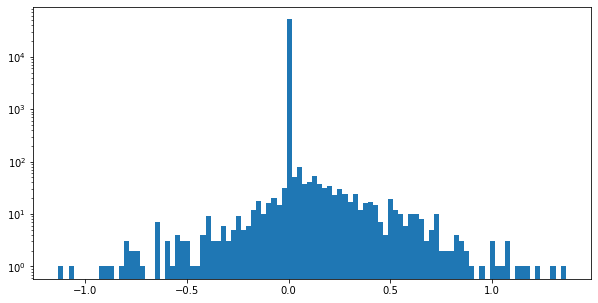

In [55]:
plt.hist(rbm.weights[61, :], bins=100);
plt.yscale('log')

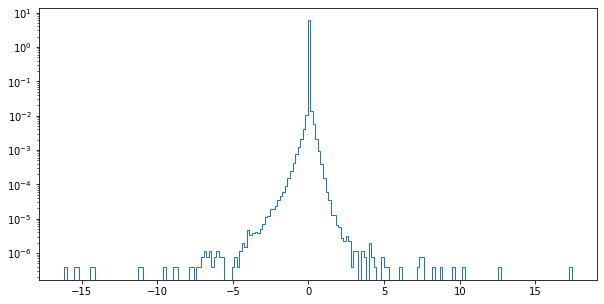

In [22]:
plot_bins = 200 # np.linspace(-250, 250, 200)
assert np.sum(np.isnan(rbm.weights)) == 0
# assert np.sum(np.isnan(rbm_2.weights)) == 0
tmp0 = plt.hist(rbm.weights.ravel(), bins=plot_bins, density=True, histtype='step');
# tmp1 = plt.hist(rbm_2.weights.ravel(), bins=plot_bins, density=True, histtype='step');
plt.yscale('log')
# plt.xlim([-5, 5])

Text(0.5, 1.0, 'Distribution of weight values of all 39 RBMs')

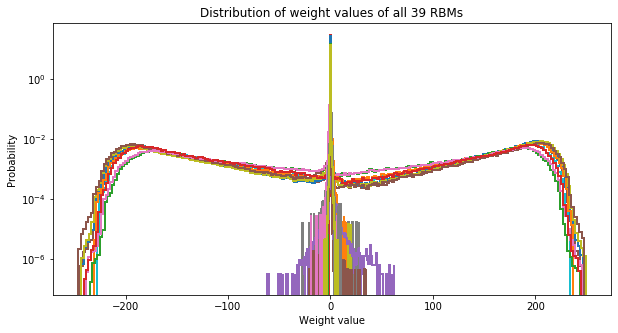

In [8]:
plt.rcParams['figure.figsize'] = (10, 5)
plot_bins = 200
hist_dict_jer = {}
for i_x, x in enumerate(list_rbms):
    rbm = pickle.load(open(rbm_folder + x, 'rb'))
    hist_dict_jer[i_x] = plt.hist(rbm.weights.ravel(), bins=plot_bins, 
                              density=True, histtype='step', linewidth=2);

plt.yscale('log'); # plt.xscale('log')
plt.xlabel('Weight value'); plt.ylabel('Probability')
plt.title(f'Distribution of weight values of all {len(list_rbms)} RBMs')

Text(0.5, 1.0, 'Distribution of weight values of all 27 RBMs')

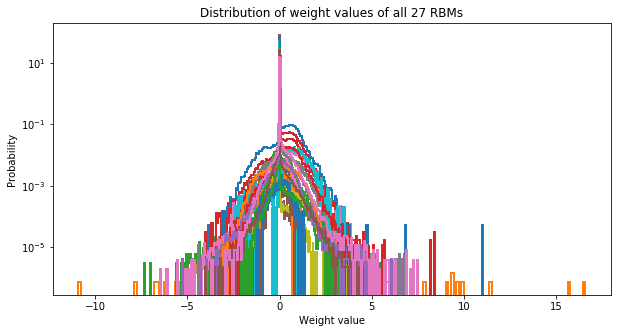

In [6]:
plt.rcParams['figure.figsize'] = (10, 5)
plot_bins = 200
hist_dict = {}
for i_x, x in enumerate(list_rbms):
    rbm = pickle.load(open(rbm_folder + x, 'rb'))
    hist_dict[i_x] = plt.hist(rbm.weights.ravel(), bins=plot_bins, 
                              density=True, histtype='step', linewidth=2);

plt.yscale('log'); # plt.xscale('log')
plt.xlabel('Weight value'); plt.ylabel('Probability')
plt.title(f'Distribution of weight values of all {len(list_rbms)} RBMs')

Text(0.5, 1.0, 'Distribution of weight values of all 66 RBMs')

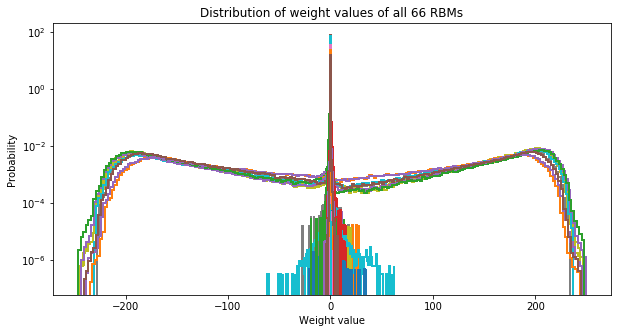

In [10]:
plt.rcParams['figure.figsize'] = (10, 5)
plot_bins = 200
hist_dict_comb = {}
for i_x, x in enumerate(list_rbms):
    rbm = pickle.load(open(rbm_folder + x, 'rb'))
    hist_dict_comb[i_x] = plt.hist(rbm.weights.ravel(), bins=plot_bins, 
                              density=True, histtype='step', linewidth=2);

plt.yscale('log'); # plt.xscale('log')
plt.xlabel('Weight value'); plt.ylabel('Probability')
plt.title(f'Distribution of weight values of all {len(list_rbms)} RBMs')

In [20]:
div_list = []
for i_x, ts in enumerate(arr_ts):
    if hist_dict_comb[i_x][1][-1] > 100:
#         print(ts)
        div_list.append(ts)
print(div_list)

['2020-04-25-0633', '2020-04-24-2308', '2020-04-26-1905', '2020-04-26-1549', '2020-04-27-1756', '2020-04-24-1107', '2020-04-26-0006', '2020-04-25-0028', '2020-04-28-2306']


False